In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Display the first few rows of the dataset
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
# Assuming you have the dataset 'SMSSpamCollection' in the same directory as your notebook
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Step 2: Data preprocessing
# Convert label to a numerical variable
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Step 4: Feature extraction and model building
# Create pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),     # Vectorization
    ('tfidf', TfidfTransformer()),   # TF-IDF transformation
    ('clf', MultinomialNB()),        # Naive Bayes classifier
])

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
# Predictions
y_pred = pipeline.predict(X_test)

# Evaluaion
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy:', accuracy_score(y_test, y_pred))


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Confusion Matrix:
[[966   0]
 [ 37 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Accuracy: 0.9668161434977578


(5.5, -0.5)

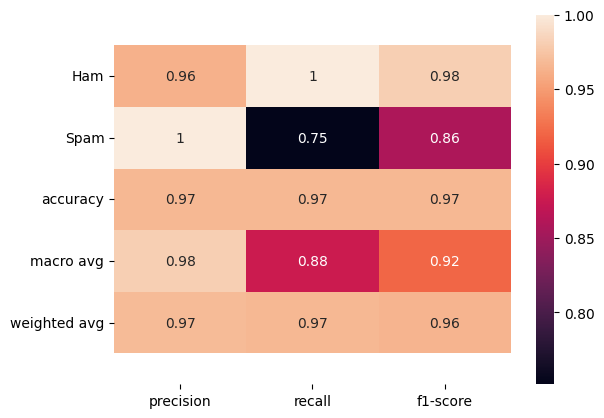

In [15]:
import seaborn as sns

target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)